In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from bs4 import BeautifulSoup

In [2]:
# Import charting libraries
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc("font", size=14)
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)
import matplotlib.font_manager as fm
# Font Imports
heading_font = fm.FontProperties(fname='PlayfairDisplay-Regular.ttf', size=28)

subtitle_font = fm.FontProperties(fname='Roboto-Regular.ttf', size=20)

lable_font = fm.FontProperties(fname='Roboto-Regular.ttf', size=20)

# Color Themes
color_bg = '#FEF1E5'
lighter_highlight = '#FAE6E1'
darker_highlight = '#FBEADC'


In [3]:
with open('transferM.html') as page:
    soup = BeautifulSoup(page, "lxml")
    soup = soup.find('tbody')

In [4]:
# exstracting players numbers (pl_num) strings from html
pl_num = soup.find_all('div', {'class': 'rn_nummer'})
pl_num_list = []
for i in pl_num:
    pl_num_list.append(i.text)

In [5]:
# exstracting players names (pl_name) strings from html
pl_name = soup.find_all('td', {'class': 'hide'})
pl_name_list = []
for i in pl_name:
    pl_name_list.append(i.text)

In [34]:
# exstracting players birth dates (pl_birth) strings from html
pl_birth = soup.find_all('td', {'class': 'zentriert'})
pl_birth_list = []
for i in pl_birth:
    pl_birth_list.append(i.text)

In [37]:
# removing unused strings from date !IMPORTANT: needs to run code twice (no time to find out why)
for i in pl_birth_list:
    if len(i) < 10:
        pl_birth_list.remove(i)

pl_birth_list

['Apr 18, 1990 (29)',
 'Jan 28, 1978 (42)',
 'Mar 16, 1990 (29)',
 'Aug 12, 1999 (20)',
 'Mar 5, 1998 (22)',
 'May 1, 1987 (32)',
 'Jul 29, 1994 (25)',
 'Aug 14, 1984 (35)',
 'Jan 26, 1991 (29)',
 'Jul 15, 1991 (28)',
 'Oct 20, 1992 (27)',
 'Apr 2, 1990 (29)',
 'Jun 25, 1997 (22)',
 'Dec 26, 1990 (29)',
 'Apr 3, 1995 (24)',
 'Apr 9, 1987 (32)',
 'Apr 4, 1987 (32)',
 'Feb 5, 1985 (35)',
 'Feb 16, 1994 (26)',
 'Sep 14, 1990 (29)',
 'May 26, 1988 (31)',
 'Nov 15, 1993 (26)',
 'Dec 10, 1987 (32)']

In [73]:
# exstracting players price (pl_price) strings from html
pl_price = soup.find_all('td', {'class': 'rechts'})
pl_price_list = []
for i in pl_price:
    pl_price_list.append(i.text)

In [39]:
# separateing ages from birth dates
age_list = []
for key, val in enumerate(pl_birth_list):
    age_list.append(val[-3:-1])
    pl_birth_list[key] = val[0:-5]

In [75]:
pl_name_series = Series(pl_name_list)
pl_num_series = Series(pl_num_list)
pl_birth_series = Series(pl_birth_list) 
pl_price_series = Series(pl_price_list) 
pl_age_series = Series(age_list)

In [76]:
for key, price in enumerate(pl_price_series):
    price = price.replace('m', '0000')
    price = price.replace('.', '')
    price = price.replace('k', '000')
    price = price.replace('€', '')
    pl_price_series[key] = price
print (pl_price_series)

0     40000000  
1      1000000  
2       500000  
3     75000000  
4     30000000  
5     25000000  
6     15000000  
7      5000000  
8     50000000  
9     20000000  
10    12000000  
11    65000000  
12    50000000  
13    35000000  
14    32000000  
15    13000000  
16     7000000  
17    75000000  
18    35000000  
19    30000000  
20    18000000  
21    90000000  
22    32000000  
dtype: object


In [77]:
# convert str date to datetype
pl_birth_series = pd.to_datetime(pd.Series(pl_birth_series))

In [78]:
juve_team = []
juve_team = pd.concat([pl_name_series, pl_num_series, pl_birth_series, pl_age_series, pl_price_series], axis=1)


In [43]:
juve_team.head()


,0,1,2,3,4
0,Wojciech Szczesny,1,1990-04-18,29,€40.00m
1,Gianluigi Buffon,77,1978-01-28,42,€1.00m
2,Carlo Pinsoglio,31,1990-03-16,29,€500k
3,Matthijs de Ligt,4,1999-08-12,20,€75.00m
4,Merih Demiral,28,1998-03-05,22,€30.00m


In [79]:
juve_team.columns = ['Name', 'Number', 'Birth Date', 'Age', 'Price']
juve_team

,Name,Number,Birth Date,Age,Price
0,Wojciech Szczesny,1,1990-04-18,29,40000000
1,Gianluigi Buffon,77,1978-01-28,42,1000000
2,Carlo Pinsoglio,31,1990-03-16,29,500000
3,Matthijs de Ligt,4,1999-08-12,20,75000000
4,Merih Demiral,28,1998-03-05,22,30000000
5,Leonardo Bonucci,19,1987-05-01,32,25000000
6,Daniele Rugani,24,1994-07-29,25,15000000
7,Giorgio Chiellini,3,1984-08-14,35,5000000
8,Alex Sandro,12,1991-01-26,29,50000000
9,Danilo,13,1991-07-15,28,20000000


In [80]:
juve_team['Age'] = juve_team['Age'].astype(int)
juve_team['Price'] = juve_team['Price'].astype(int)

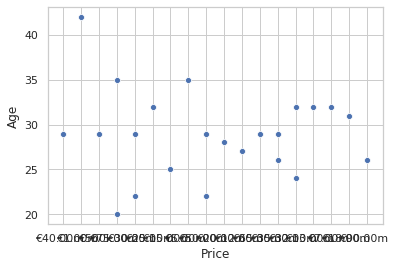

In [52]:
sns.set(style="whitegrid")
ax = sns.scatterplot(y="Age", x='Price', data = juve_team)
#plt.savefig('wieght_box.png')

In [54]:
a = 'Juve.html'
a[0:-5]

'Juve'